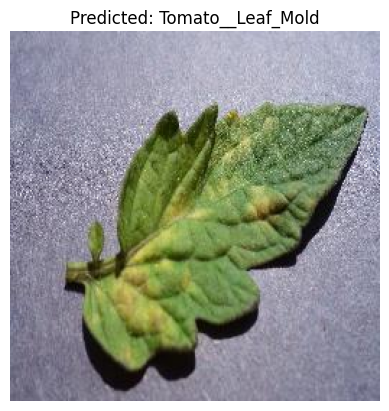

In [4]:
# notebooks/3_predict_single_image.ipynb (as Python script)

# Step 1: Imports
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import os

# Step 2: Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Step 3: Class names (ensure same order as training dataset)
class_names = [
    'Tomato__Bacterial_spot',
    'Tomato__Early_blight',
    'Tomato__Late_blight',
    'Tomato__Leaf_Mold',
    'Tomato__Septoria_leaf_spot',
    'Tomato__Spider_mites Two-spotted_spider_mite',
    'Tomato__Target_Spot',
    'Tomato__Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato__Tomato_mosaic_virus',
    'Tomato__healthy'
]

# Step 4: Load model
model = models.resnet18(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, len(class_names))
model.load_state_dict(torch.load('../models/tomato_resnet18.pth', map_location=device))
model = model.to(device)
model.eval()

# Step 5: Define transform
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Step 6: Load image (change path below)
image_path = '/home/guest/Anvitha_Vinod/leaf_ai_project/single_pred/2a15214d-cee6-4359-8baa-7281f3fc0182___Crnl_L.Mold 8672.JPG'  # <- REPLACE with your image path
img = Image.open(image_path).convert('RGB')

# Step 7: Preprocess and predict
input_tensor = transform(img).unsqueeze(0).to(device)
with torch.no_grad():
    output = model(input_tensor)
    _, predicted_idx = torch.max(output, 1)
    predicted_class = class_names[predicted_idx.item()]

# Step 8: Display result
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {predicted_class}")
plt.show()